<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



=========== VARIABLE: Weekly_Sales ===========



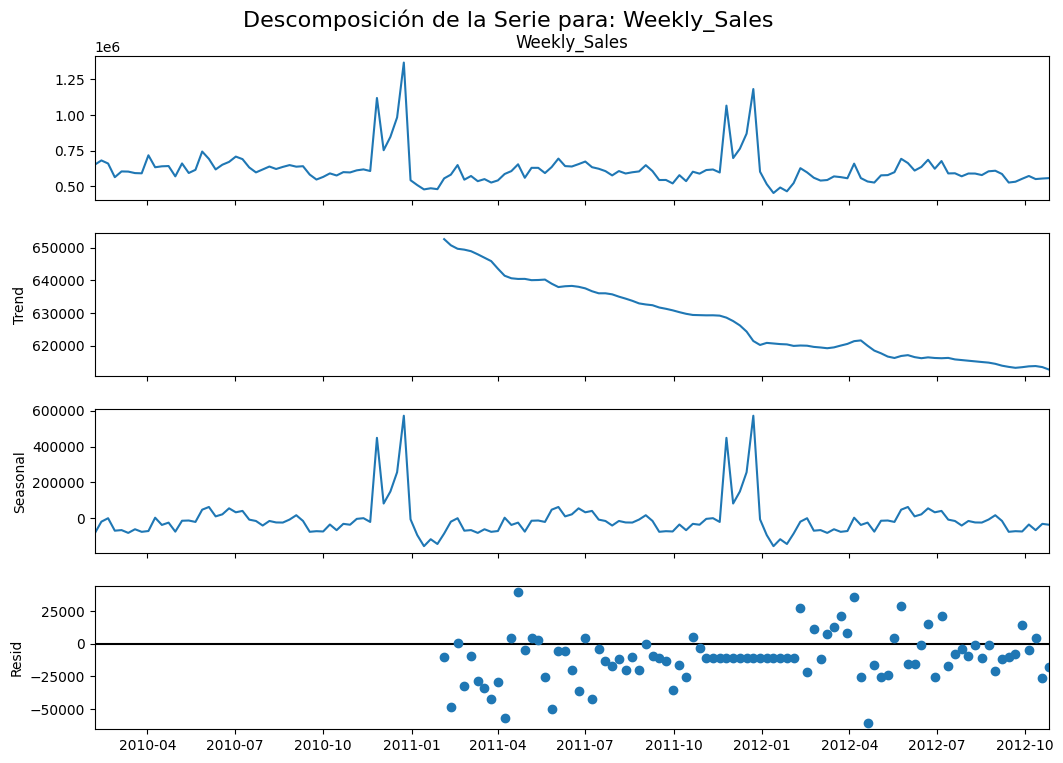

Estadístico ADF: -3.0718809741334394
p-value: 0.028705324882623555
Los residuales son estacionarios (rechazamos H0).


=========== VARIABLE: Temperature ===========



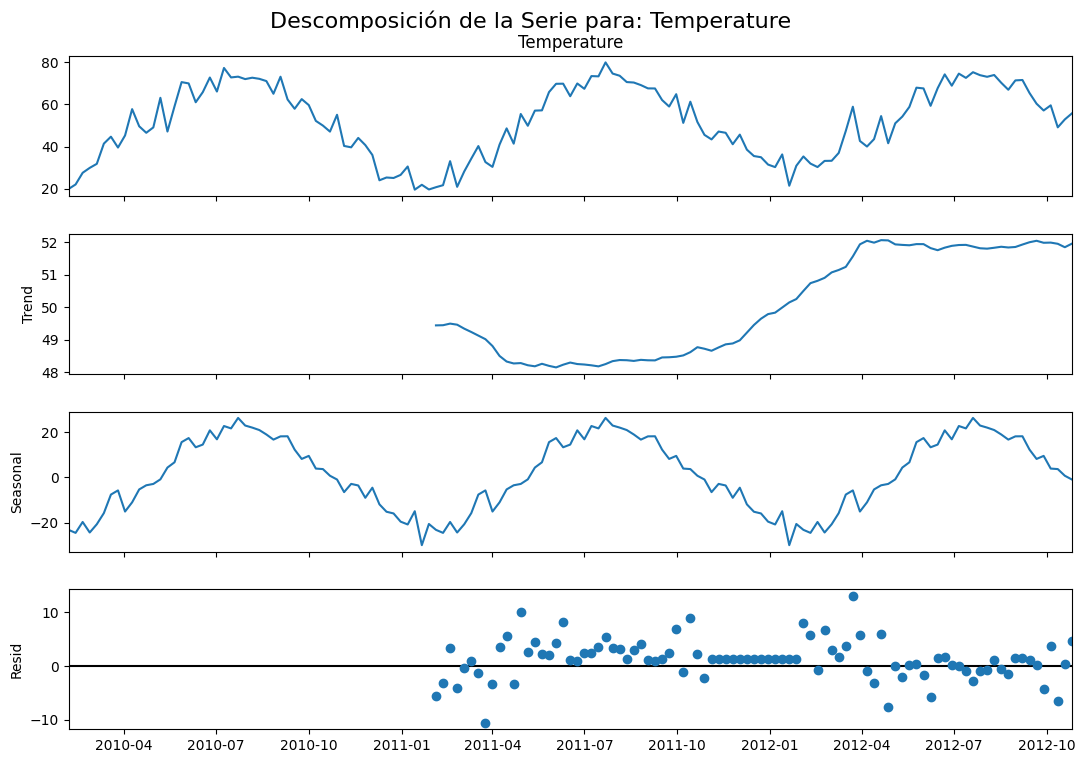

Estadístico ADF: -3.095510509271788
p-value: 0.026887219813550623
Los residuales son estacionarios (rechazamos H0).


=========== VARIABLE: Fuel_Price ===========



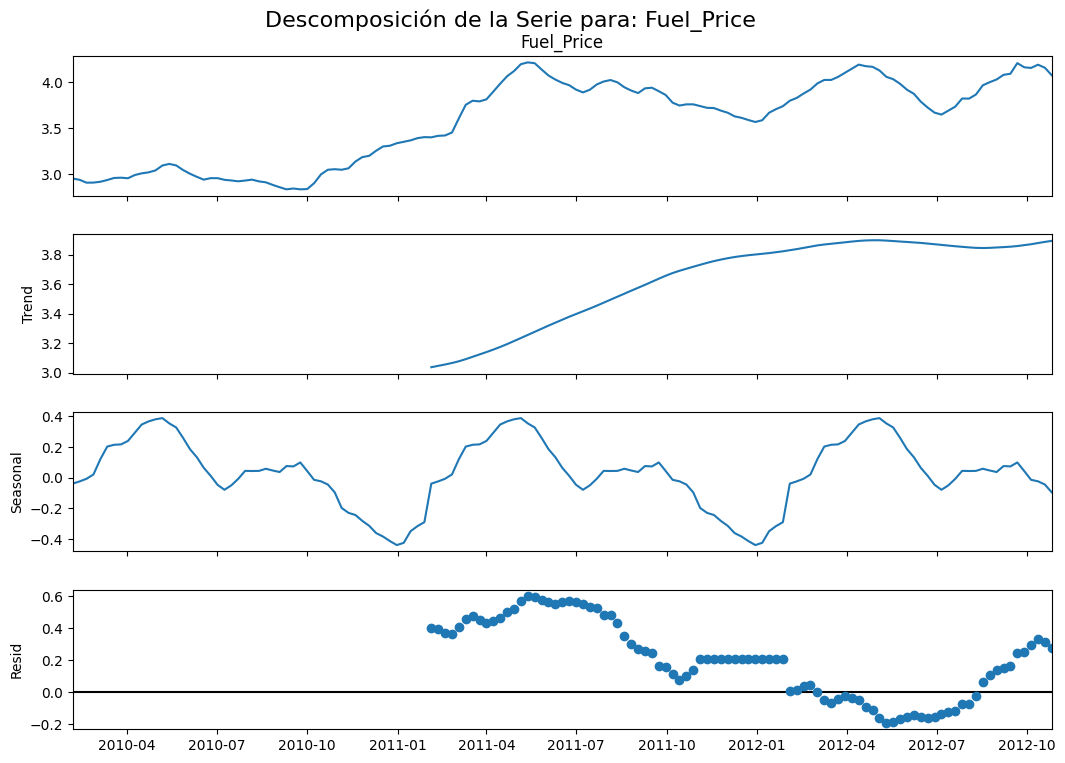

Estadístico ADF: -1.193477472833377
p-value: 0.6763952258888408
Los residuales no son estacionarios (no rechazamos H0).


=========== VARIABLE: CPI ===========



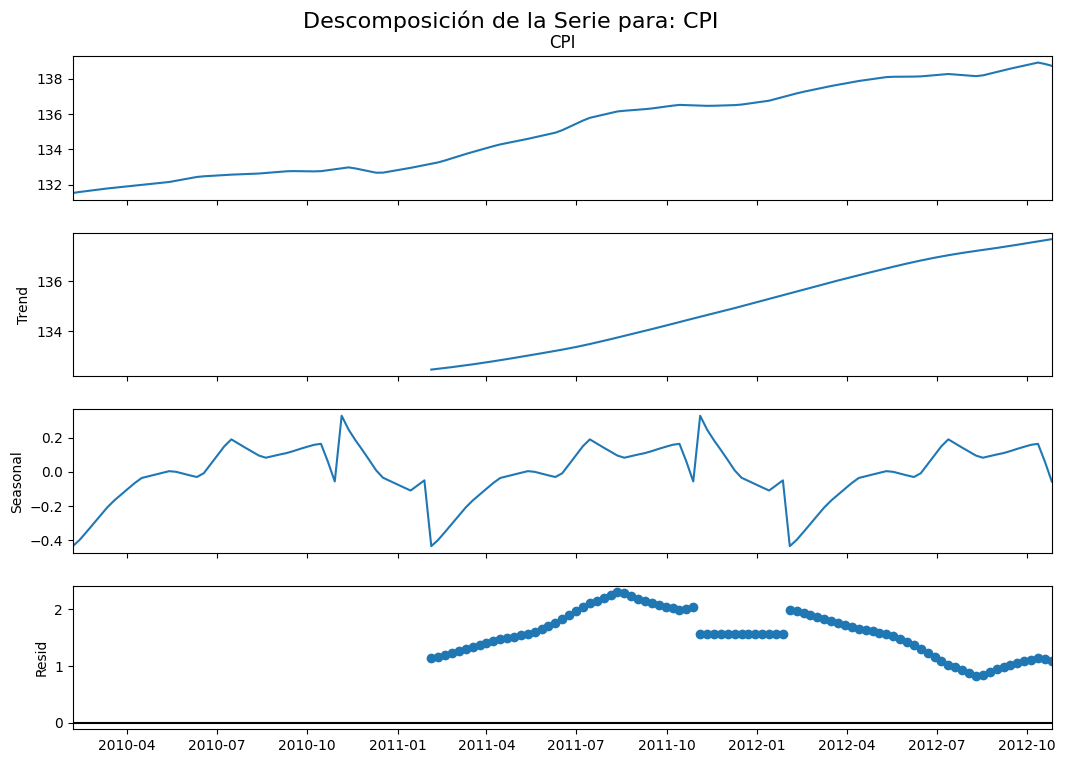

Estadístico ADF: -1.0645494770573387
p-value: 0.729000209636844
Los residuales no son estacionarios (no rechazamos H0).


=========== VARIABLE: Unemployment ===========



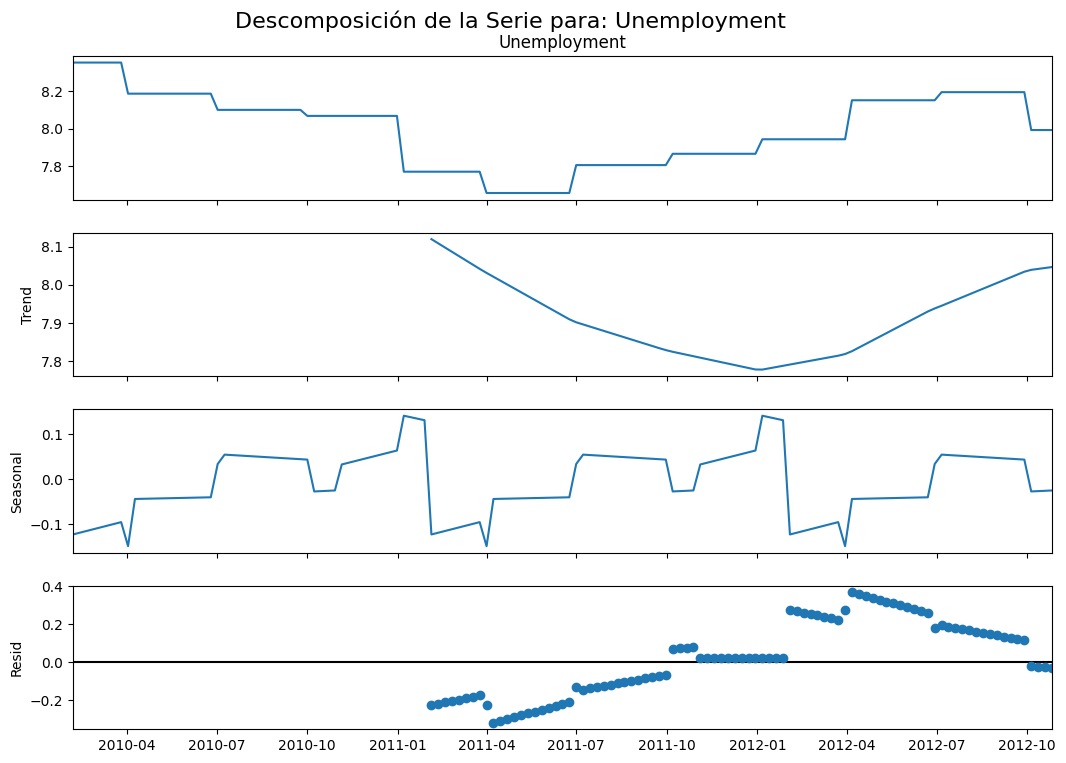

Estadístico ADF: -1.362172910550135
p-value: 0.600270633725945
Los residuales no son estacionarios (no rechazamos H0).


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/Walmart_Sales.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')
df = df[df['Store'] == 15]
df.set_index('Date', inplace=True)

# VARIABLES
variables = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# PERIODO DE REPETICIÓN (SEMANAL)
periodo = 52   # un año de semanas


for var in variables:
    print(f"\n\n=========== VARIABLE: {var} ===========\n")

    descomposicion = sm.tsa.seasonal_decompose(
        df[var],
        model='additive',
        period=periodo,
        extrapolate_trend=0,
        two_sided=False
    )

    fig = descomposicion.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f"Descomposición de la Serie para: {var}", fontsize=16)
    plt.show()

    # Prueba Dickey-Fuller en los residuales
    from statsmodels.tsa.stattools import adfuller
    resid = descomposicion.resid.dropna()

    adf_test = adfuller(resid)

    print("Estadístico ADF:", adf_test[0])
    print("p-value:", adf_test[1])

    if adf_test[1] <= 0.05:
        print("Los residuales son estacionarios (rechazamos H0).")
    else:
        print("Los residuales no son estacionarios (no rechazamos H0).")